# Setup and Obtaining Statistics

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from scipy import stats
import nba_api.stats.endpoints as nba

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'

In [5]:
df = nba.leaguedashoppptshot.LeagueDashOppPtShot().get_data_frames()
df = pd.DataFrame(df[0])
print(df.shape)
print(df.head)

"""
Dataframe explanation:

NBA's API returns a list of IDs, names, and statistics related to NBA basketball. In this particular notebook,
we take a look at the correlation between an opponent's FGM, or field goals made, and FG_PCT, or field goal
percentage.

Field goals made - the amount of shots a team makes in a game
Field goal percentage - the amount of field goals made, divided by field goals attempted

Thorough this notebook, some code lines may be commented out. That is because that particular line
is very useful when analyzing a different endpoint of NBA's API response, but it might not be
necessary for analyzing the currently displayed dataframe
"""

(30, 18)
<bound method NDFrame.head of        TEAM_ID               TEAM_NAME TEAM_ABBREVIATION  GP   G  \
0   1610612749         Milwaukee Bucks               MIL  72  72   
1   1610612764      Washington Wizards               WAS  72  72   
2   1610612754          Indiana Pacers               IND  72  72   
3   1610612751           Brooklyn Nets               BKN  72  72   
4   1610612762               Utah Jazz               UTA  72  72   
5   1610612760   Oklahoma City Thunder               OKC  72  72   
6   1610612759       San Antonio Spurs               SAS  72  72   
7   1610612753           Orlando Magic               ORL  72  72   
8   1610612758        Sacramento Kings               SAC  72  72   
9   1610612750  Minnesota Timberwolves               MIN  72  72   
10  1610612740    New Orleans Pelicans               NOP  72  72   
11  1610612737           Atlanta Hawks               ATL  72  72   
12  1610612763       Memphis Grizzlies               MEM  72  72   
13  16106

"\nDataframe explanation:\n\nNBA's API returns a list of IDs, names, and statistics related to NBA basketball. In this particular notebook,\nwe take a look at the correlation between an opponent's FGM, or field goals made, and FG_PCT, or field goal\npercentage.\n\nField goals made - the amount of shots a team makes in a game\nField goal percentage - the amount of field goals made, divided by field goals attempted\n\nThorough this notebook, some code lines may be commented out. That is because that particular line\nis very useful when analyzing a different endpoint of NBA's API response, but it might not be\nnecessary for analyzing the currently displayed dataframe\n"

# Filtering statistics

In [6]:
data = df[['TEAM_ABBREVIATION', 'FG_PCT', 'FG3_PCT']]

print(data.columns)

print(data.sort_values("FG3_PCT", 0))

Index(['TEAM_ABBREVIATION', 'FG_PCT', 'FG3_PCT'], dtype='object')
   TEAM_ABBREVIATION  FG_PCT  FG3_PCT
24               NYK   0.440    0.338
4                UTA   0.447    0.342
11               ATL   0.463    0.349
27               LAL   0.460    0.352
23               LAC   0.463    0.355
22               PHX   0.467    0.355
17               CHI   0.473    0.356
13               GSW   0.452    0.359
19               PHI   0.453    0.360
20               DET   0.477    0.361
29               DEN   0.468    0.363
3                BKN   0.459    0.365
26               MIA   0.459    0.365
18               DAL   0.460    0.365
5                OKC   0.474    0.366
2                IND   0.468    0.366
16               CHA   0.468    0.366
12               MEM   0.462    0.367
1                WAS   0.471    0.369
14               POR   0.473    0.372
7                ORL   0.471    0.373
21               BOS   0.465    0.374
6                SAS   0.472    0.376
28               TOR  

# Outlier Detection

In [7]:
#outliers = data[np.abs(stats.zscore(data[['FGM', 'FG_PCT']])) > 2]
#outliers.shape
outliers = data

# Regression

# Graphing

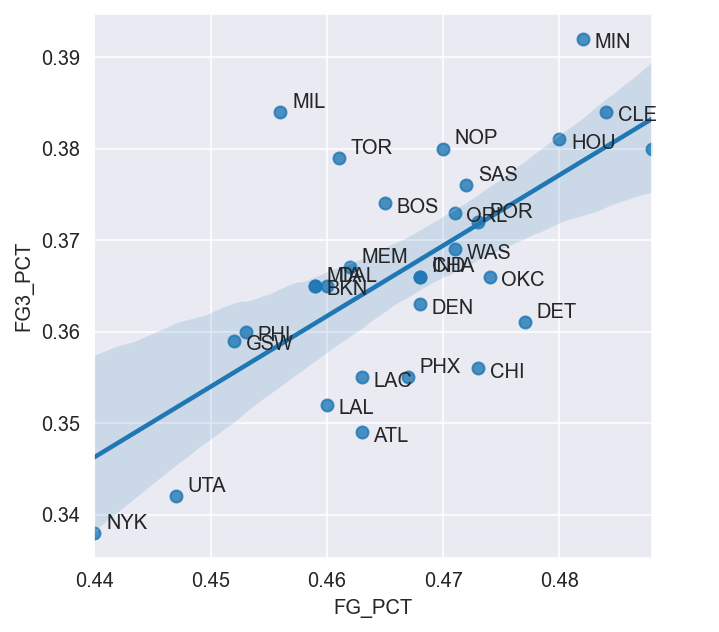

In [8]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(5, 5))
ax.set(xlabel='FG2%', ylabel='FG3%')
abacate = (0.5, -1)
sns.regplot(ax=ax, data=data, x=data['FG_PCT'], y=data['FG3_PCT'])
#sns.scatterplot(ax=ax, data=outliers, x='FGM', y='FG3_PCT')

# decision hyperplane plotting

# name plotting
for i in range(outliers.shape[0]):
    #outliers.sort_values("FG3_PCT", 0, inplace=True)
    x_pos = outliers["FG_PCT"].iloc[i] + 0.001
    y_pos = outliers["FG3_PCT"].iloc[i] + abacate[i % 2] * 0.001
    names = outliers['TEAM_ABBREVIATION'].iloc[i].split(" ")
    #names[0] = names[0][0] + '.'
    #last_names = names[1]#' '.join(names)
    last_names = names[0]
    ax.annotate(text=last_names, xy=(x_pos, y_pos), xycoords='data')

plt.savefig("output/team_defense", dpi=300)